# Google Play Store Analysis

In [1]:
#Importing all the libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading and Exploring the datasets 

In [2]:
df1 = pd.read_csv('googleplaystore.csv')

In [3]:
df2 = pd.read_csv('googleplaystore_user_reviews.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [7]:
df1.shape

(10841, 13)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [10]:
df2.shape

(64295, 5)

In [11]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [12]:
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64290     True
64291     True
64292     True
64293     True
64294     True
Length: 64295, dtype: bool

In [13]:
df3 = pd.merge(df1,df2)
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [14]:
# Mergeing the two datasets
df3.to_csv('Merge_Data.csv',index = False)

# Reading the new dataset

In [15]:
df = pd.read_csv('Merge_Data.csv')
df.head()

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [16]:
df.shape

(122662, 17)

In [17]:
# Cheching the counts of duplicate values in the dataset
df.duplicated().value_counts()

True     80965
False    41697
dtype: int64

In [18]:
# Droping the duplicate values
df = df.drop_duplicates(keep = 'first')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41697 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     41697 non-null  object 
 1   Category                41697 non-null  object 
 2   Rating                  41658 non-null  float64
 3   Reviews                 41697 non-null  int64  
 4   Size                    41697 non-null  object 
 5   Installs                41697 non-null  object 
 6   Type                    41697 non-null  object 
 7   Price                   41697 non-null  object 
 8   Content Rating          41697 non-null  object 
 9   Genres                  41697 non-null  object 
 10  Last Updated            41697 non-null  object 
 11  Current Ver             41697 non-null  object 
 12  Android Ver             41697 non-null  object 
 13  Translated_Review       40448 non-null  object 
 14  Sentiment               40456 non-nul

In [20]:
# checking for the null values
df.isnull().sum()

App                          0
Category                     0
Rating                      39
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         1249
Sentiment                 1241
Sentiment_Polarity        1241
Sentiment_Subjectivity    1241
dtype: int64

In [21]:
#droping the rows  with null values
df.dropna(inplace = True)

In [22]:
df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [23]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.25,1.0


### checking the unique values in each column 

In [24]:
df['App'].unique()

array(['Coloring book moana', 'Garden Coloring Book',
       'FlipaClip - Cartoon animation',
       "Boys Photo Editor - Six Pack & Men's Suit",
       'Colorfit - Drawing & Coloring', 'Animated Photo Editor',
       'Anime Manga Coloring Book', 'Easy Origami Ideas',
       'Floor Plan Creator',
       'Canva: Poster, banner, card maker & graphic design',
       'CDL Practice Test 2018 Edition', 'Free VIN Report for Used Cars',
       'DMV Permit Practice Test 2018 Edition',
       'Android Auto - Maps, Media, Messaging & Voice',
       'Best Car Wallpapers', 'BEST CAR SOUNDS',
       'AutoScout24 Switzerland – Find your new car',
       'Fuelio: Gas log & costs',
       'BestCam Selfie-selfie, beauty camera, photo editor',
       'Hairstyles step by step', 'Filters for Selfie',
       'Beauty Camera - Selfie Camera', 'Filters for B Live',
       'Dresses Ideas & Fashions +3000', 'Amazon Kindle', 'Cool Reader',
       'Dictionary - Merriam-Webster', 'Free Panda Radio Music',
       'F

In [25]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'FAMILY', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'COMICS',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'SPORTS', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.25,1.0


In [27]:
df['Rating'].unique()

array([3.9, 4.4, 4.3, 4.1, 4.7, 4.5, 4.2, 4.9, 4.6, 4. , 3.5, 3.8, 3.7,
       3.3, 3.4, 3. , 3.6, 4.8, 3.1, 3.2, 2.7, 2.6])

In [28]:
df['Reviews'].unique()

array([    967,     974,   13791, ...,  179139, 1275373,  223941],
      dtype=int64)

In [29]:
df['Size'].unique()

array(['14M', '33M', '39M', '12M', '25M', '6.1M', '11M',
       'Varies with device', '24M', '17M', '2.4M', '27M', '16M', '2.9M',
       '38M', '21M', '8.2M', '4.2M', '5.9M', '37M', '6.8M', '10M', '2.1M',
       '42M', '3.9M', '18M', '3.2M', '20M', '26M', '48M', '8.5M', '28M',
       '46M', '7.8M', '6.6M', '5.1M', '4.0M', '32M', '4.7M', '2.7M',
       '118k', '7.3M', '695k', '56M', '29M', '40M', '3.1M', '5.0M', '31M',
       '8.0M', '7.9M', '13M', '7.2M', '41M', '2.8M', '15M', '44M', '8.1M',
       '4.5M', '7.4M', '1.9M', '1.8M', '2.3M', '5.2M', '1.2M', '5.6M',
       '72M', '9.6M', '23M', '19M', '43M', '9.5M', '8.9M', '65M', '22M',
       '3.8M', '8.4M', '58M', '50M', '45M', '53M', '68M', '66M', '35M',
       '76M', '9.4M', '6.9M', '4.3M', '67M', '5.5M', '3.3M', '3.6M',
       '7.5M', '9.1M', '8.3M', '7.0M', '77M', '5.7M', '5.3M', '30M',
       '232k', '99M', '624k', '95M', '8.5k', '292k', '55M', '4.4M', '36M',
       '3.0M', '1.7M', '7.7M', '74M', '97M', '98M', '4.9M', '52M', '78M',


In [30]:
df['Installs'].unique()

array(['500,000+', '1,000,000+', '5,000,000+', '100,000+', '10,000,000+',
       '100,000,000+', '50,000,000+', '10,000+', '1,000,000,000+',
       '500,000,000+', '50,000+', '1,000+'], dtype=object)

In [31]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [32]:
for a in df['Content Rating'].unique():
  print(a)

Everyone
Teen
Mature 17+
Everyone 10+
Adults only 18+


In [33]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000


In [34]:
df['Sentiment'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [35]:
df['Price'].unique()

array(['0', 0, '$4.99', '$6.99', '$3.99', '$11.99', '$9.99', '$29.99',
       '$2.49', '$0.99'], dtype=object)

### Type casting and removing the unwanted variables from each columns

In [36]:
# Removing underscore in the 'category' column
df['Category'] = df['Category'].str.replace('_', ' ')
df['Category'].head()

0    ART AND DESIGN
1    ART AND DESIGN
2    ART AND DESIGN
4    ART AND DESIGN
5    ART AND DESIGN
Name: Category, dtype: object

In [37]:
# converting 'Reviews' values to integer 
# df['Reviews'] = df['Reviews'].apply(lambda x : int(x)) the lambda code can also be used
df['Reviews'] = df['Reviews'].astype(int)

In [38]:
df['Reviews'].dtype

dtype('int32')

In [39]:
# removing the character values in 'Size' and converting 'Size' values to float
df['Size'] = df['Size'].apply(lambda x : str(x).replace('M', '') if 'M' in str(x) else (x) )
df['Size'] = df['Size'].apply(lambda x : float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else (x))
df['Size'] = df['Size'].apply(lambda x : str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else(x))
df['Size'] = df['Size'].astype(float)

In [40]:
df['Size'].dtype

dtype('float64')

In [41]:
# Removing the + sign in 'Installs' column and converting the dtype to int
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.strip('+')
df['Installs'] = df['Installs'].astype(int)


In [42]:
df['Price'] = df['Price'].str.strip('$')
df['Price'] = df['Price'].astype(float)

In [43]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40410 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40410 non-null  object 
 1   Category                40410 non-null  object 
 2   Rating                  40410 non-null  float64
 3   Reviews                 40410 non-null  int32  
 4   Size                    40410 non-null  float64
 5   Installs                40410 non-null  int32  
 6   Type                    40410 non-null  object 
 7   Price                   30357 non-null  float64
 8   Content Rating          40410 non-null  object 
 9   Genres                  40410 non-null  object 
 10  Last Updated            40410 non-null  object 
 11  Current Ver             40410 non-null  object 
 12  Android Ver             40410 non-null  object 
 13  Translated_Review       40410 non-null  object 
 14  Sentiment               40410 non-nul

In [45]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,40410.000000,4.041000e+04,40410.000000,4.041000e+04,30357.000000,40410.000000,40410.000000
mean,4.324870,2.197498e+06,21.459570,5.902115e+07,0.102276,0.168089,0.495124
std,0.285914,7.454746e+06,27.290244,1.713685e+08,1.304376,0.343181,0.250381
min,2.600000,4.600000e+01,0.000000,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.200000,1.703000e+04,0.000000,1.000000e+06,0.000000,0.000000,0.373737
50%,4.400000,1.114500e+05,9.500000,1.000000e+07,0.000000,0.136364,0.512963
75%,4.500000,1.468638e+06,33.000000,5.000000e+07,0.000000,0.387772,0.645833
max,4.900000,7.815831e+07,99.000000,1.000000e+09,29.990000,1.000000,1.000000


In [46]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0        2018-01-15
1        2018-01-15
2        2018-01-15
4        2018-01-15
5        2018-01-15
            ...    
122646   2018-08-06
122652   2018-08-06
122659   2018-08-06
122660   2018-08-06
122661   2018-08-06
Name: Last Updated, Length: 40410, dtype: datetime64[ns]

### Exploring the dataset

In [47]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


## Visualization Phase

#### 1 Which app is the most rated?

In [48]:
# App and rating would be plotted against each other; group by function would be used to find the highest(top 10)
# Grouping two columns ['App','Ratings']
most_rating_by_app = df.groupby('App')['Rating'].value_counts().sort_values(ascending = False).head(10)
most_rating_by_app


App                             Rating
8 Ball Pool                     4.5       672
Helix Jump                      4.2       558
Angry Birds Classic             4.4       535
Bowmasters                      4.7       485
Google Photos                   4.5       404
Clash Royale                    4.6       384
Bubble Shooter                  4.5       375
DRAGON BALL LEGENDS             4.6       325
Calorie Counter - MyFitnessPal  4.6       297
Adobe Acrobat Reader            4.3       294
Name: Rating, dtype: int64

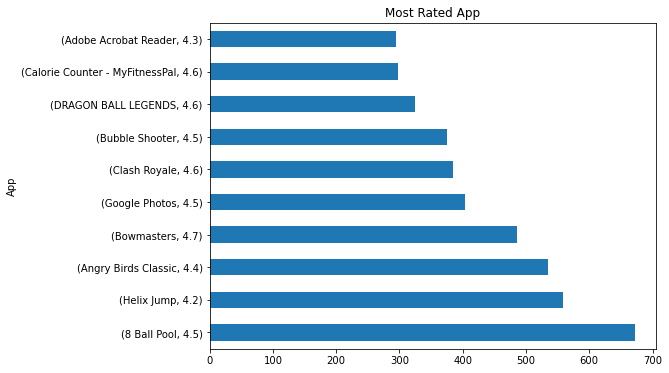

In [77]:
most_rating_by_app.plot(kind ='barh', xlabel = 'App', ylabel = 'Rating', title = 'Most Rated App', figsize =(8,6));

In [50]:
# The above barh chart shows that '8 ball Pool' is the most rated.

#### 2. Get the free and paid apps with their ratings

In [51]:
df['App'].value_counts().head(10)

8 Ball Pool                       672
Helix Jump                        558
Angry Birds Classic               535
Bowmasters                        485
Bubble Shooter                    450
Google Photos                     404
Clash Royale                      384
DRAGON BALL LEGENDS               325
Calorie Counter - MyFitnessPal    297
Adobe Acrobat Reader              294
Name: App, dtype: int64

In [52]:
#Selecting two columns to perform a bi-variate analysis
free_paid_app = df[['Type', 'Rating']]
free_paid_app.head(10)

,Type,Rating
0,Free,3.9
1,Free,3.9
2,Free,3.9
4,Free,3.9
5,Free,3.9
7,Free,3.9
8,Free,3.9
9,Free,3.9
10,Free,3.9
11,Free,3.9


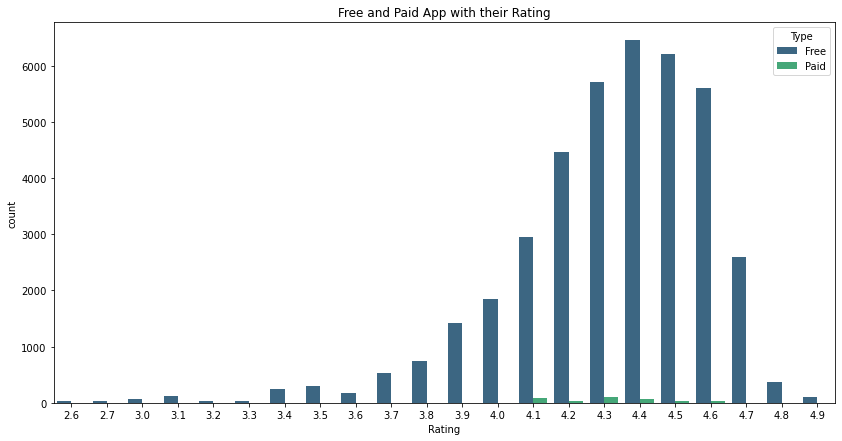

In [53]:
# Visualizing free and paid apps with their Ratings
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Rating', data = free_paid_app, hue = 'Type', palette = 'viridis' )
plt.title('Free and Paid App with their Rating');

In [54]:
# the above chart shows that both free and paid apps were rated high but the number of people using free apps are more compared to paid apps

#### 3. Which category uses the paid app?

In [55]:
# subsetting to get dataset with paid apps only
paidApp = df[df['Type']=='Paid']
paidApp.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
66940,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
66941,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Very good, better graphics would better (more ...",Positive,0.552000,0.586000


In [56]:
#checking for the unique values
paidApp['Category'].unique()

array(['GAME', 'FAMILY', 'MEDICAL', 'SPORTS', 'PERSONALIZATION'],
      dtype=object)

In [57]:
paidApp['Category'].value_counts()

PERSONALIZATION    139
MEDICAL             77
FAMILY              72
GAME                42
SPORTS              40
Name: Category, dtype: int64

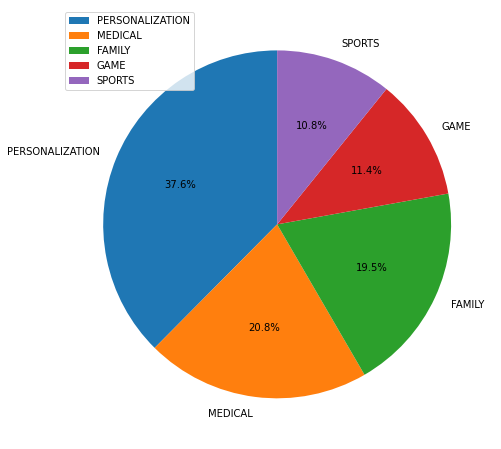

In [58]:
# using pie chat to visualize the catigory
plt.figure(figsize= (15,8))
plt.pie(paidApp['Category'].value_counts(),
        labels = paidApp['Category'].value_counts().index,
        startangle=90,
        autopct = '%1.1f%%'
        )
plt.legend();

#### 4.What are the top 10 Paid Apps and their category

In [59]:
# grouping the category and app to get the top 10 paid apps and their category
paid_category = paidApp.groupby('Category')['App'].value_counts().sort_values(ascending = False).head(10)
paid_category

Category         App                           
FAMILY           Dr. Panda & Toto's Treehouse      72
PERSONALIZATION  HD Widgets                        62
MEDICAL          Essential Anatomy 3               40
PERSONALIZATION  BIG Launcher                      40
SPORTS           Golfshot Plus: Golf GPS           40
GAME             Farming Simulator 18              39
MEDICAL          Diabetes & Diet Tracker           37
PERSONALIZATION  Beautiful Widgets Pro             37
GAME             Call of Duty:Black Ops Zombies     3
Name: App, dtype: int64

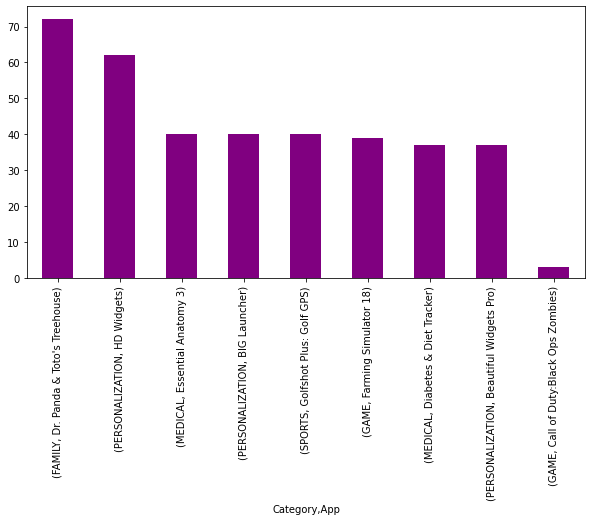

In [60]:
plot = paid_category.plot.bar(figsize=(10, 5),color='purple')

#### 5.which categories of app is mostly downloaded with respect to the content rating(everyone, teen.......)?

In [61]:
rate =df.groupby("Category")["Content Rating"].value_counts().unstack().fillna(0)
rate

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Category,,,,,
ART AND DESIGN,0.0,354.0,0.0,0.0,0.0
AUTO AND VEHICLES,0.0,252.0,0.0,0.0,31.0
BEAUTY,0.0,288.0,0.0,29.0,0.0
BOOKS AND REFERENCE,0.0,443.0,0.0,0.0,268.0
BUSINESS,0.0,803.0,0.0,0.0,0.0
COMICS,0.0,0.0,0.0,0.0,80.0
COMMUNICATION,0.0,1198.0,0.0,90.0,0.0
DATING,0.0,66.0,0.0,1345.0,76.0
EDUCATION,0.0,737.0,0.0,0.0,0.0


In [62]:
everyone =rate.sort_values('Everyone',ascending = False)
#everyone["Everyone"].nlargest(n=10)
every = everyone["Everyone"]
every = pd.DataFrame(every)
every.columns = ["Everyone"]
every.head(5)

,Everyone
Category,
GAME,6325.0
FAMILY,2775.0
HEALTH AND FITNESS,1719.0
TOOLS,1662.0
PRODUCTIVITY,1655.0


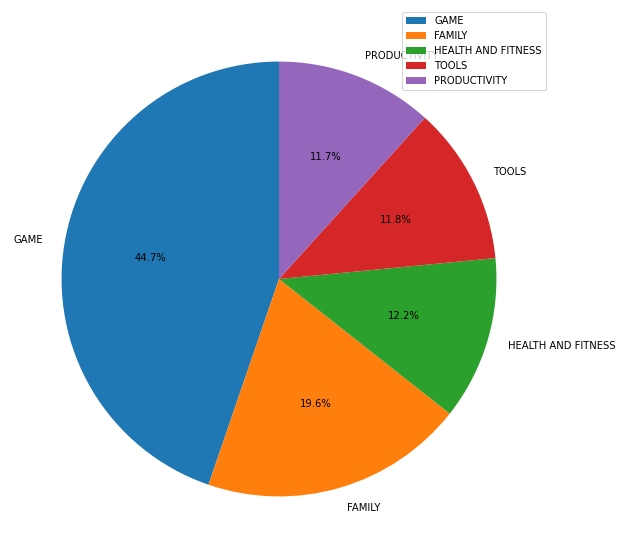

In [63]:
plt.figure(figsize= (15,10))
plt.pie(every['Everyone'].head(5),
        labels = every['Everyone'].head(5).index,
        startangle=90,
        autopct = '%1.1f%%'
        )
plt.legend();

#### 6 what are their review on the app based on the sentiment

In [64]:
senti_by_app = df.groupby('App')['Sentiment'].value_counts().sort_values(ascending = False).head(10)
senti_by_app= pd.DataFrame(senti_by_app)
senti_by_app.columns=['senti_app']
senti_by_app.head()

senti_app
App                 Sentiment           
Helix Jump          Positive         378
8 Ball Pool         Positive         336
                    Negative         322
Google Photos       Positive         304
Angry Birds Classic Negative         295

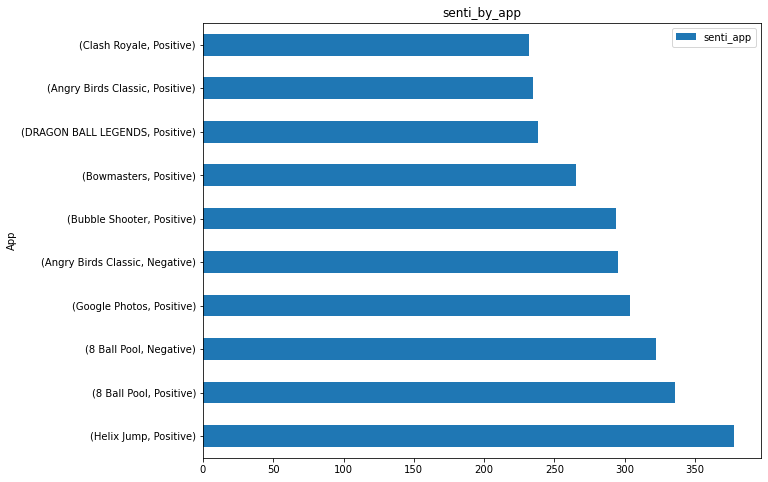

In [65]:
senti_by_app.plot(kind ='barh', xlabel = 'App', ylabel = 'Sentiment',title='senti_by_app', figsize = (10,8));

#### 7.what was the max and min size of paid and free app?

In [66]:
# 7 what is the maximum and miniumum size(Mb) of app
app_install = df.groupby('App')['Size'].max().sort_values(ascending = False)
app_install = pd.DataFrame(app_install)
app_install.head()

,Size
App,
Hero Hunters,99.0
Chakra Cleansing,99.0
Clash of Clans,98.0
Angry Birds Classic,97.0
Game of Thrones: Conquest™,97.0


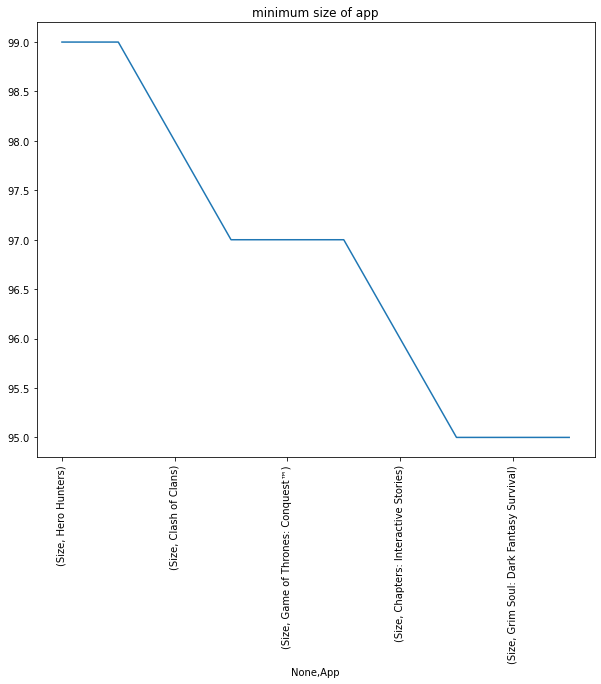

In [84]:
# Apps that have the max size
plt.figure(figsize= (10,8))
app_install.head(10).unstack().plot().plot( stack = True)
plt.xticks(rotation =90)
plt.title('minimum size of app')
plt.show()

In [78]:
# App that have the min size
app_installs = df.groupby('App')['Size'].min().sort_values()
app_installs = pd.DataFrame(app_install)
app_installs.tail(4)

,Size
App,
Calls Blacklist - Call Blocker,0.0
Calculator Plus Free,0.0
Calculator - unit converter,0.0
Housing-Real Estate & Property,0.0


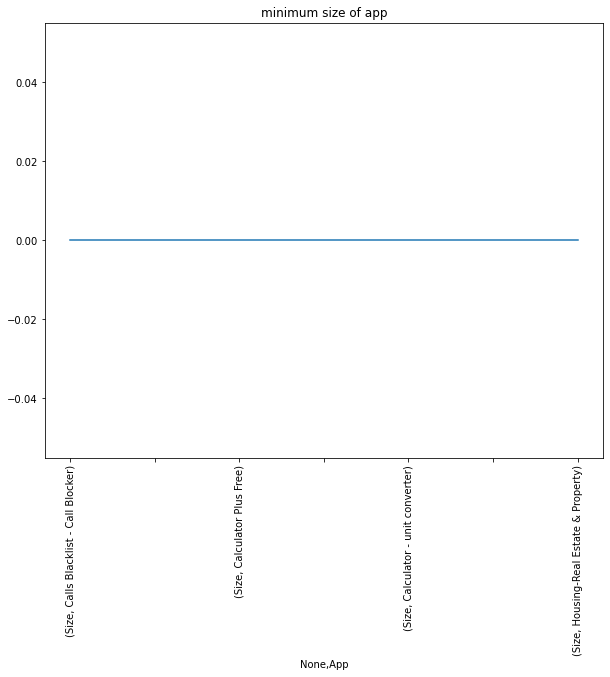

In [82]:
#Apps that have the min size
plt.figure(figsize= (10,8))
app_installs.tail(4).unstack().plot().plot( stack = True)
plt.xticks(rotation =90)
plt.title('minimum size of app')
plt.show()

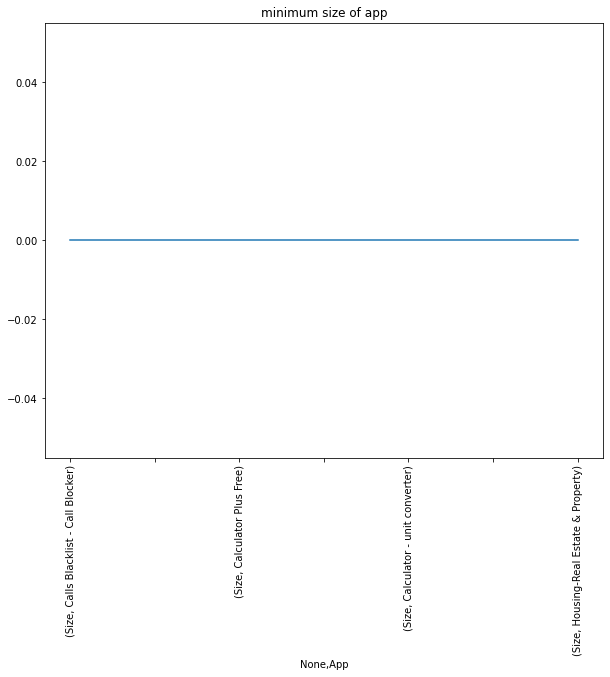

#### 8.Which app category has the highest installation Between paid and free app?

In [85]:
paidApp.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
66940,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
66941,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Very good, better graphics would better (more ...",Positive,0.552000,0.586000


In [86]:
highest_paid_app_installs = paidApp.groupby('Category')['Installs'].value_counts().sort_values(ascending=False)
highest_paid_app_installs

Category         Installs
PERSONALIZATION  1000000     99
FAMILY           50000       72
GAME             100000      42
MEDICAL          50000       40
PERSONALIZATION  10000       40
SPORTS           50000       40
MEDICAL          1000        37
Name: Installs, dtype: int64

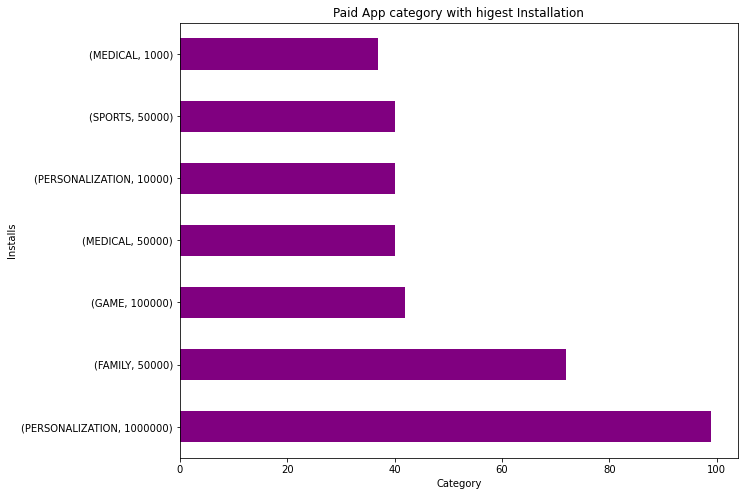

In [87]:
plot = highest_paid_app_installs.plot.barh(figsize =(10,8),color='purple')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Paid App category with higest Installation')
plt.show()

In [88]:
# the above chart shows that personalization category was the highest installed in terms of paid apps

In [89]:
# subseting for free app
free_app = df[df['Type'] == 'Free']
free_app.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [90]:
#creating new data frame for free app
free_app_installs = free_app.groupby('Category')['Installs'].value_counts()
free_app_installs = pd.DataFrame(free_app_installs)
free_app_installs.columns = ['Instalation Counts']
free_app_installs.head(10)

Instalation Counts
Category          Installs                    
ART AND DESIGN    100000                   127
                  1000000                   90
                  500000                    58
                  5000000                   41
                  10000000                  38
AUTO AND VEHICLES 100000                   131
                  1000000                  121
                  10000000                  31
BEAUTY            500000                   111
                  100000                   107

In [91]:
# checking for highest installed
highest_free_app_installs = pd.DataFrame(free_app_installs.sort_values(by=['Instalation Counts'], ascending = False)).head(10)
highest_free_app_installs

Instalation Counts
Category     Installs                     
GAME         100000000                4051
             10000000                 2127
             50000000                 1432
             5000000                  1035
FAMILY       10000000                 1025
FINANCE      1000000                   634
PRODUCTIVITY 10000000                  632
FAMILY       1000000                   613
TOOLS        10000000                  586
SPORTS       1000000                   563

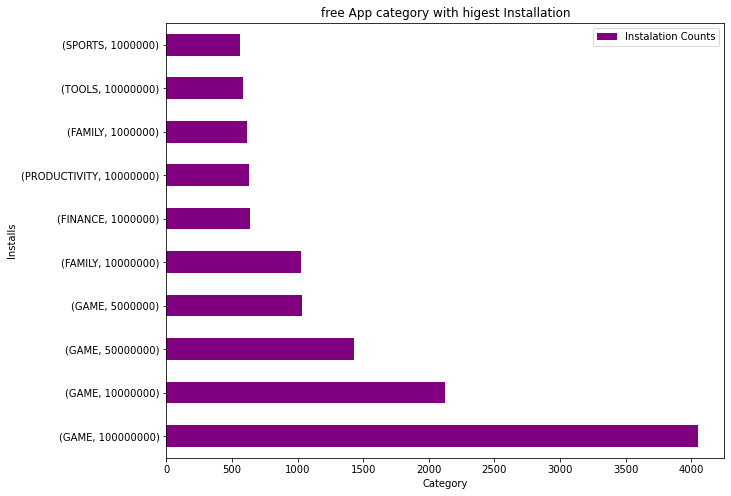

In [92]:
plot = highest_free_app_installs.plot.barh(figsize =(10,8),color='purple')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('free App category with higest Installation')
plt.show();

In [93]:
# the above chart shows that game category was the highest installed in terms of free apps.

#### 9.What percentage of the apps are free and paid?What percentage of the apps are free and paid?

In [95]:
free_to_paid = df['Type'].value_counts().rename_axis('sub_values').reset_index(name='counts')
free_to_paid

,sub_values,counts
0,Free,40040
1,Paid,370


In [96]:
xlabel = free_to_paid.sub_values
ylabel = free_to_paid.counts
#autopact(autopercentage) fxn returns list of strings used to label the wedge with their numerical values

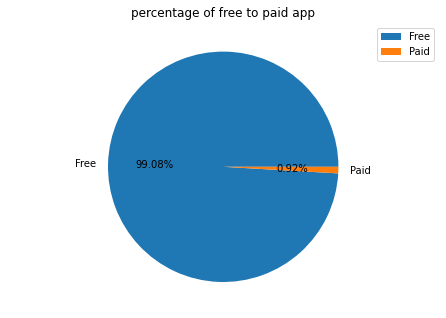

In [98]:
#visualising the pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(ylabel, labels = xlabel, autopct='%1.2f%%')
plt.title('percentage of free to paid app')
plt.legend();
plt.show;

#### 10. What category of app has been most downloaded?

In [100]:
install_app = df[['App', 'Installs']]
install_app.head(10)

,App,Installs
0,Coloring book moana,500000
1,Coloring book moana,500000
2,Coloring book moana,500000
4,Coloring book moana,500000
5,Coloring book moana,500000
7,Coloring book moana,500000
8,Coloring book moana,500000
9,Coloring book moana,500000
10,Coloring book moana,500000
11,Coloring book moana,500000


In [101]:
install_app = df.groupby('App')['Installs'].value_counts().sort_values(ascending = False).head(10)
install_app

App                             Installs  
8 Ball Pool                     100000000     672
Helix Jump                      100000000     558
Angry Birds Classic             100000000     535
Bowmasters                      50000000      485
Google Photos                   1000000000    404
Clash Royale                    100000000     384
DRAGON BALL LEGENDS             5000000       325
Bubble Shooter                  10000000      300
Calorie Counter - MyFitnessPal  50000000      297
Adobe Acrobat Reader            100000000     294
Name: Installs, dtype: int64

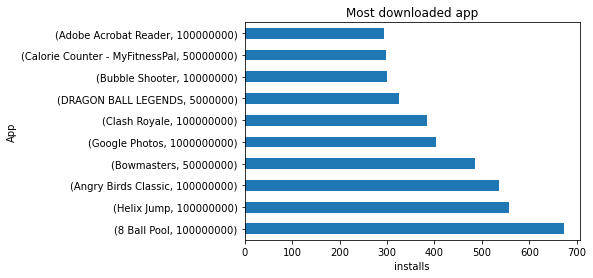

In [103]:
install_app.plot(kind='barh')
plt.ylabel('App')
plt.xlabel('installs')
plt.title('Most downloaded app')
plt.rcParams['figure.figsize'] = (13,6)

#### 11.Plot a graph showing count and content rating.

In [104]:
counts_ofcontent_rating = df['Content Rating'].value_counts()
counts_ofcontent_rating

Everyone           31277
Teen                5440
Mature 17+          2077
Everyone 10+        1581
Adults only 18+       35
Name: Content Rating, dtype: int64

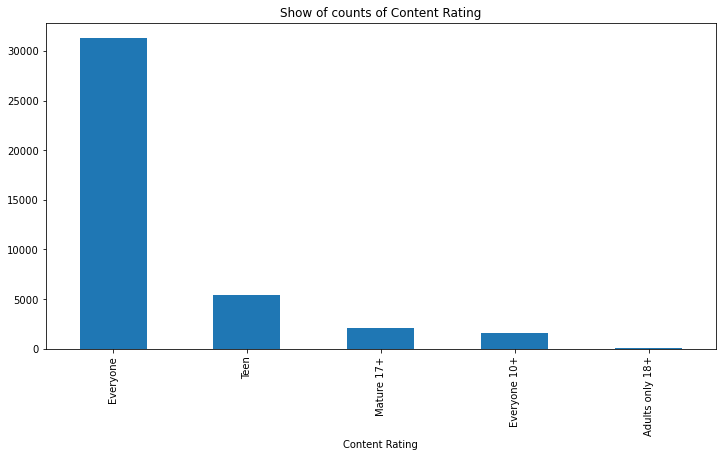

In [105]:
# Chart showing the counts and content rating
plt.figure(figsize =(12, 6))
counts_ofcontent_rating.plot(kind = 'bar')
plt.xlabel('Content Rating')
plt.title('Show of counts of Content Rating')
plt.show()

#### 12.Top 5 expensive apps in the google play store.

In [106]:
paidApp = df[df['Type']== "Paid"]
paidApp.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
66940,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
66941,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Very good, better graphics would better (more ...",Positive,0.552000,0.586000
66942,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Love game, gyroscope controls work. It gets st...",Positive,0.215238,0.451429


In [108]:
expensive_apps = df.groupby(paidApp['App'])['Price'].max().sort_values(axis = 0, ascending = False).head(5)
expensive_apps

App
Golfshot Plus: Golf GPS           29.99
Essential Anatomy 3               11.99
BIG Launcher                       9.99
Diabetes & Diet Tracker            9.99
Call of Duty:Black Ops Zombies     6.99
Name: Price, dtype: float64

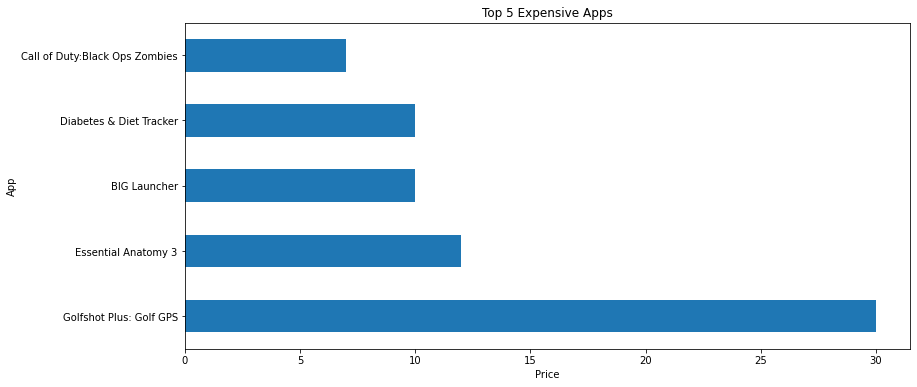

In [109]:
expensive_apps.plot(kind = 'barh')
plt.xlabel('Price')
plt.ylabel('App')
plt.title('Top 5 Expensive Apps')
plt.show()

#### 13. Which Genre has more Apps

In [111]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [112]:
#finding the value counts of Genres and converting it to dataframe
Genre_App = df['Genres'].value_counts()
Genre_App = pd.DataFrame(Genre_App)
Genre_App.columns = ['App Counts']
Genre_App.head(10)

,App Counts
Action,3192
Sports,2192
Health & Fitness,1888
Travel & Local,1747
Casual,1707
Tools,1662
Productivity,1655
Finance,1581
Photography,1528
Arcade,1492


In [113]:
#creating new dataframe from Genre_App
Genre_more_App = pd.DataFrame(Genre_App.sort_values(by = ['App Counts'], ascending = False)).head(10)
Genre_more_App

,App Counts
Action,3192
Sports,2192
Health & Fitness,1888
Travel & Local,1747
Casual,1707
Tools,1662
Productivity,1655
Finance,1581
Photography,1528
Arcade,1492


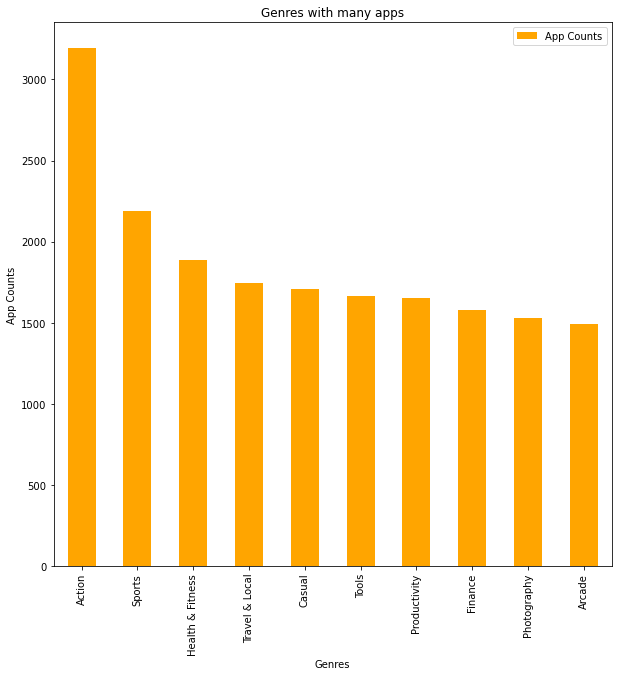

In [114]:
plot = Genre_more_App.plot.bar(figsize=(10,10),color='orange')
plt.title('Genres with many apps')
plt.ylabel('App Counts')
plt.xlabel('Genres');

In [67]:
#to see the columns that have numerical data
df_numbers = df.select_dtypes(include='number')
df_numbers

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
0,3.9,967,14.0,500000,0.0,-0.250000,1.000000
1,3.9,967,14.0,500000,0.0,-0.725000,0.833333
2,3.9,967,14.0,500000,0.0,0.000000,0.000000
4,3.9,967,14.0,500000,0.0,0.500000,0.600000
5,3.9,967,14.0,500000,0.0,-0.800000,0.900000
...,...,...,...,...,...,...,...
122646,4.5,223941,0.0,10000000,0.0,0.475000,0.512500
122652,4.5,223941,0.0,10000000,0.0,0.566667,0.733333
122659,4.5,223941,0.0,10000000,0.0,0.200000,0.200000
122660,4.5,223941,0.0,10000000,0.0,0.000000,0.000000


#### 14. what are the corrilation between all the columns

In [116]:
#Columns that are not numerical data
df_letters = df.select_dtypes(exclude='number')
df_letters.head(3)

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment
0,Coloring book moana,ART AND DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative
1,Coloring book moana,ART AND DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative
2,Coloring book moana,ART AND DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral


In [117]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.068828,0.088283,0.008312,-0.015508,0.075225,0.071518
Reviews,0.068828,1.000000,0.173368,0.560561,-0.016065,-0.094323,-0.007640
Size,0.088283,0.173368,1.000000,-0.032286,0.020715,-0.126711,0.015599
Installs,0.008312,0.560561,-0.032286,1.000000,-0.024216,-0.053681,-0.004561
Price,-0.015508,-0.016065,0.020715,-0.024216,1.000000,0.020718,0.000120
Sentiment_Polarity,0.075225,-0.094323,-0.126711,-0.053681,0.020718,1.000000,0.244195
Sentiment_Subjectivity,0.071518,-0.007640,0.015599,-0.004561,0.000120,0.244195,1.000000


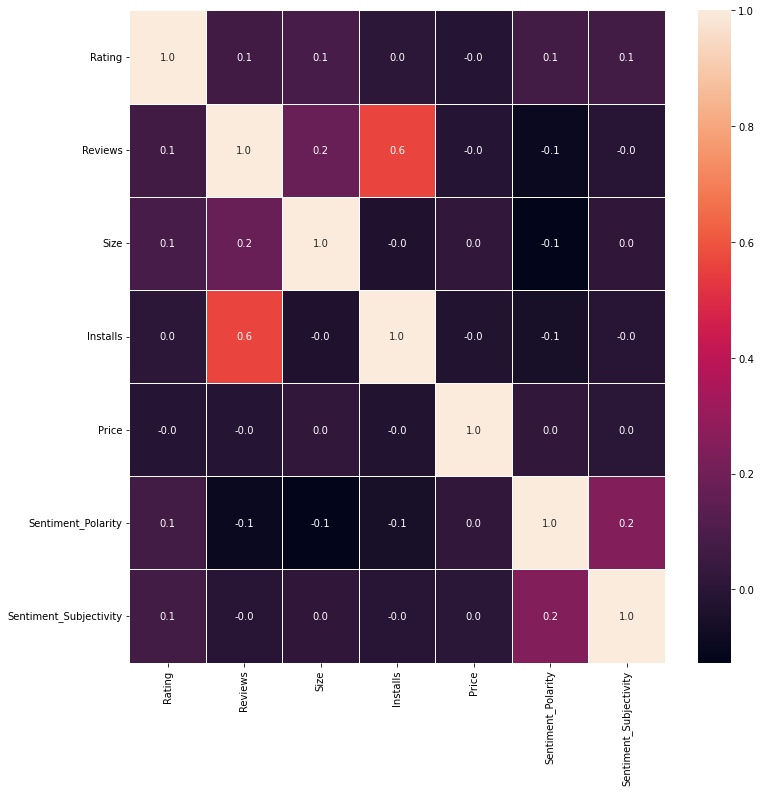

In [118]:
# Correlation map
m,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax =ax)
plt.show()

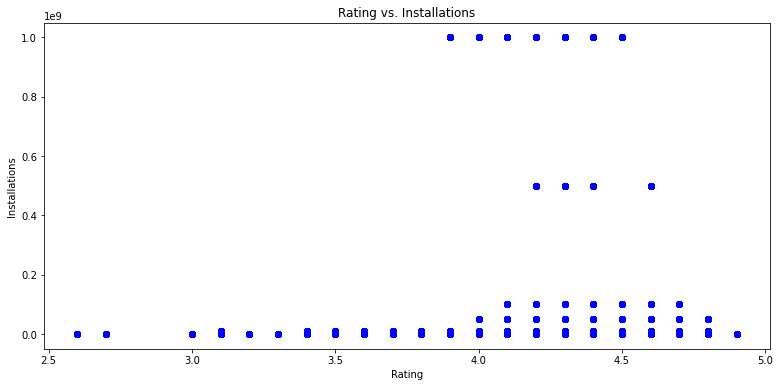

In [119]:
#to check if there is a correlation between ratings and installation i.e are people installing based on the ratings
free_app = df[df['Type']=='Free']
plt.scatter(free_app['Rating'],free_app['Installs'],color='b')
plt.xlabel('Rating')
plt.ylabel('Installations')
plt.title('Rating vs. Installations');

In [120]:
correlation_ratings_installations = free_app['Rating'].corr(free_app['Installs'])
correlation_ratings_installations

0.008237695380240363

The above analysis shows that there is a negative correlation between ratings and installations of free apps. Which means that the apps ratings has no direct effects on installations.

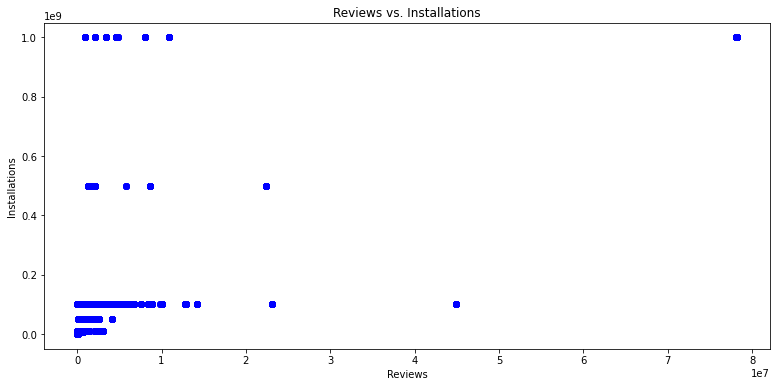

In [121]:
plt.scatter(free_app['Reviews'],free_app['Installs'],color='b')
plt.xlabel('Reviews')
plt.ylabel('Installations')
plt.title('Reviews vs. Installations');

In [122]:
correlation_reviews_installations = free_app['Reviews'].corr(free_app['Installs'])
correlation_reviews_installations

0.5601609795562299

The above analysis shows that there is a positive correlation between reviews and installations of free apps. Which means that the apps reviews has direct effects on installations.

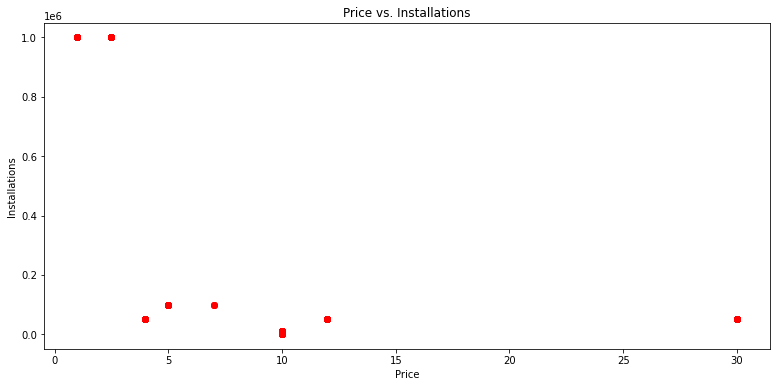

In [123]:
paid_app = df[df['Type']=='Paid']
plt.scatter(paid_app['Price'],paid_app['Installs'],color='r')
plt.xlabel('Price')
plt.ylabel('Installations')
plt.title('Price vs. Installations');

In [125]:
correlation_price_installations = paid_app['Price'].corr(paid_app['Installs'])
correlation_price_installations

-0.5000113047168178

The above analysis shows that there is a negative correlation between price and installations of paid apps. Which means that the apps prices have no direct effects on installations.

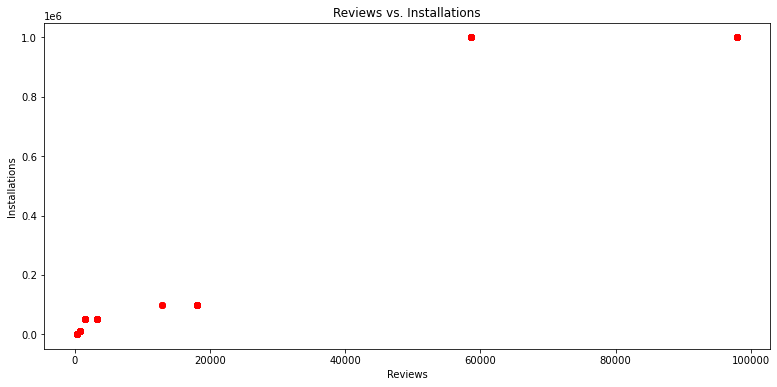

In [126]:
plt.scatter(paid_app['Reviews'],paid_app['Installs'],color='r')
plt.xlabel('Reviews')
plt.ylabel('Installations')
plt.title('Reviews vs. Installations');

In [127]:
correlation_price_installations = paid_app['Reviews'].corr(paid_app['Installs'])
correlation_price_installations

0.9466828905278917

The above analysis shows that there is a high positive correlation between reviews and installations of paid apps. Which means that the reviews of the paid apps have a high direct effects on installations.

#### 15. Sentiment analysis

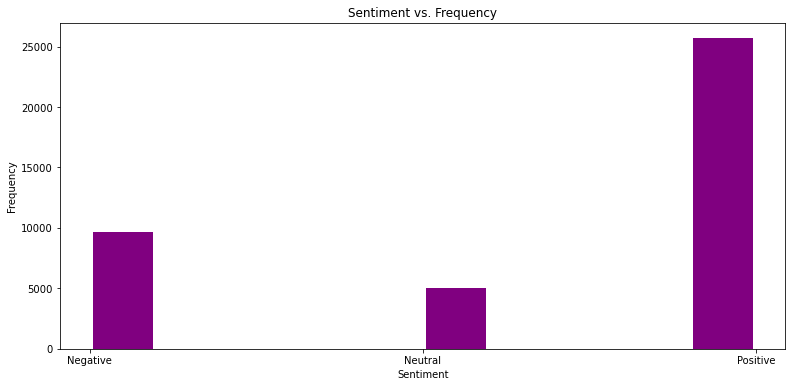

In [129]:
plt.hist(df['Sentiment'],rwidth=0.9,color='purple')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment vs. Frequency');